# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

## Загрузка данных

1) Посмотрим на случайные строчки. 

2) Посмотрим, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, заменим их на что-то. 

In [2]:
data = pd.read_csv('./train_1.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [3]:
data.loc[data['TotalSpent'] == ' ', ['ClientPeriod', 'MonthlySpending','TotalSpent']]

,ClientPeriod,MonthlySpending,TotalSpent
1048,0,25.75,
1707,0,73.35,
2543,0,19.70,
3078,0,80.85,
3697,0,20.00,
4002,0,61.90,
4326,0,25.35,
4551,0,52.55,
4598,0,56.05,


In [4]:
# Для удобства напишем списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.info()
print()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

(5282, 20)

In [7]:
# Просто удалим объекты с пропущенными значениями, т.к. их кол-во крайне 
# мало по сравнению с размером датасета

data = data.replace(' ',np.nan)
#data['TotalSpent'] = data['TotalSpent'].astype(float)
#data['TotalSpent'] = data['TotalSpent'].fillna(data['TotalSpent'].median())
data = data.replace(' ',np.nan)
data = data.dropna()
data['TotalSpent'] = data['TotalSpent'].astype(float)

## Анализ данных

1) Для численных признаков построим гистограмму. Для категориальных посчитаем количество каждого значения для каждого признака. 

2) Посмотрим на распределение целевой переменной и скажем, являются ли классы несбалансированными.

Второй пункт очень важен, потому что задача классификации может иметь несбалансированные классы целевой переменной.
В таком случае для построения лучшей модели небходимо  
*   не использовать accuracy как метрику 
*   использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [8]:
data[num_cols].corr()     # проверим корреляцию, но на отбор признаков это не повлияло, т.к. без тотала модель работает хуже

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.000000,0.248583,0.826332
MonthlySpending,0.248583,1.000000,0.652034
TotalSpent,0.826332,0.652034,1.000000


In [9]:
data[num_cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.00,0.25,0.83
MonthlySpending,0.25,1.00,0.65
TotalSpent,0.83,0.65,1.00


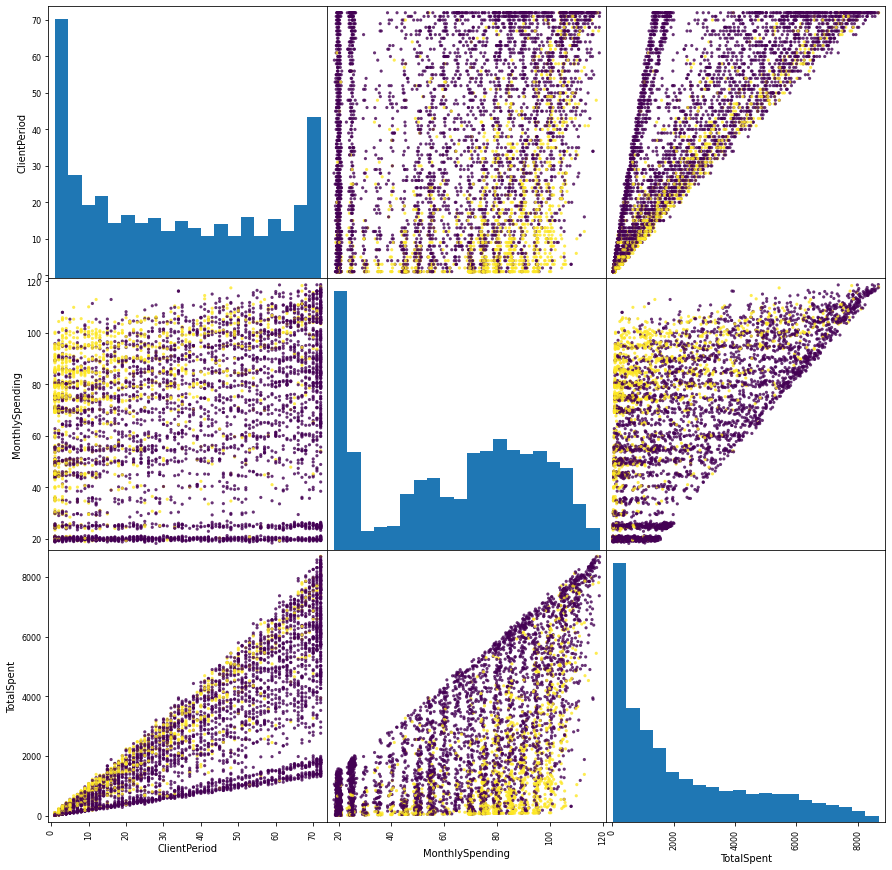

In [10]:
pd.plotting.scatter_matrix(data[num_cols], c=data[target_col], figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

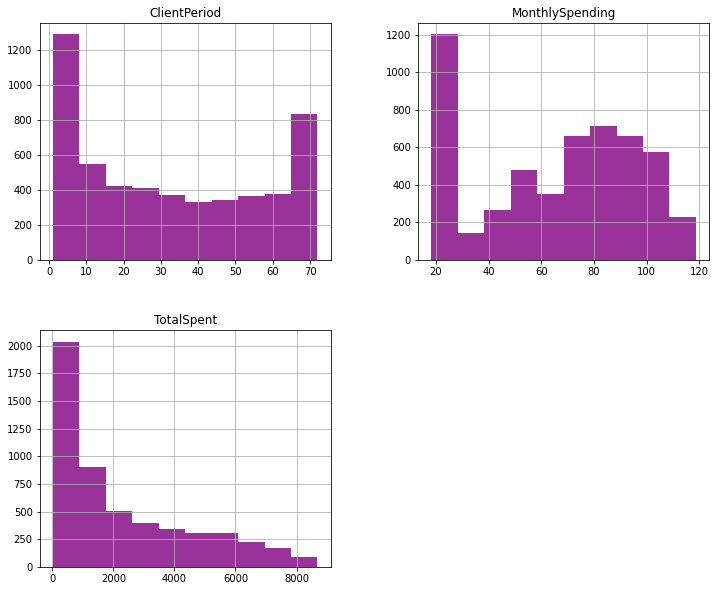

In [14]:
data[num_cols].hist(figsize=(12,10), color = 'purple', alpha = 0.8) 

None

In [ ]:
# Визуализация пропущенных значений по всему фрейму

#colors = ['#000099','#ffff00']
#sns.heatmap(data[feature_cols].isna(), cmap=sns.color_palette(colors)) 
#for i in range(len(feature_cols)):
# miss = np.mean(data[feature_cols[i]].isna())
# print('{} - {}%'.format(feature_cols[i], round(miss*100)))            # Отношение пропущенных значений в %

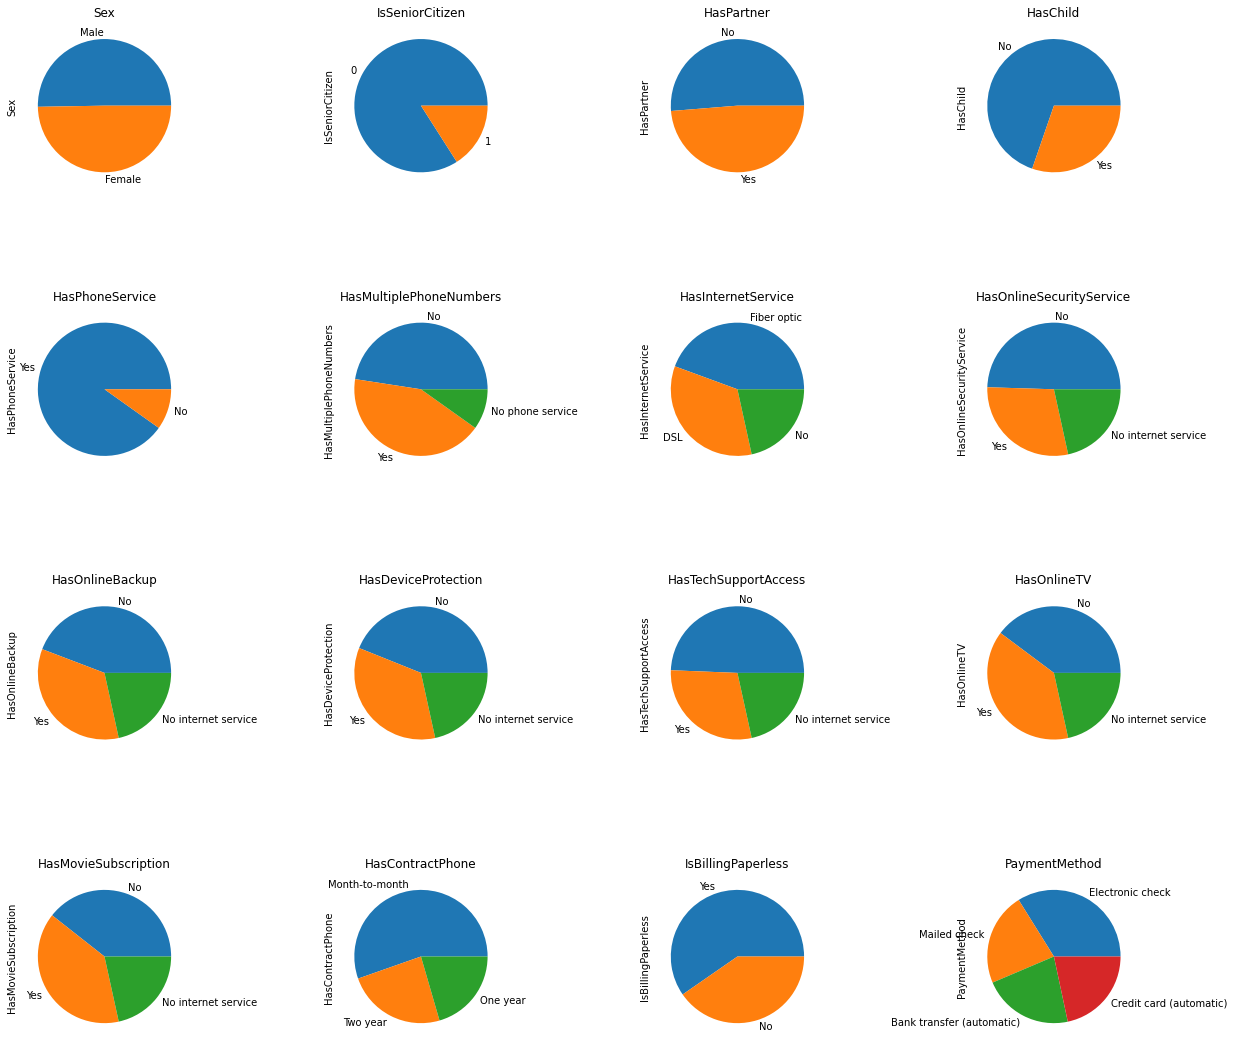

In [20]:
rows, cols = 4,4

fig,axs = plt.subplots(rows,cols,figsize=(20,20))
for i,col in enumerate(cat_cols):
    r,c = i//cols, i%cols
    data[col].value_counts().plot(kind='pie',ax=axs[r,c],title=col)
    plt.subplots_adjust(wspace=0.9)
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

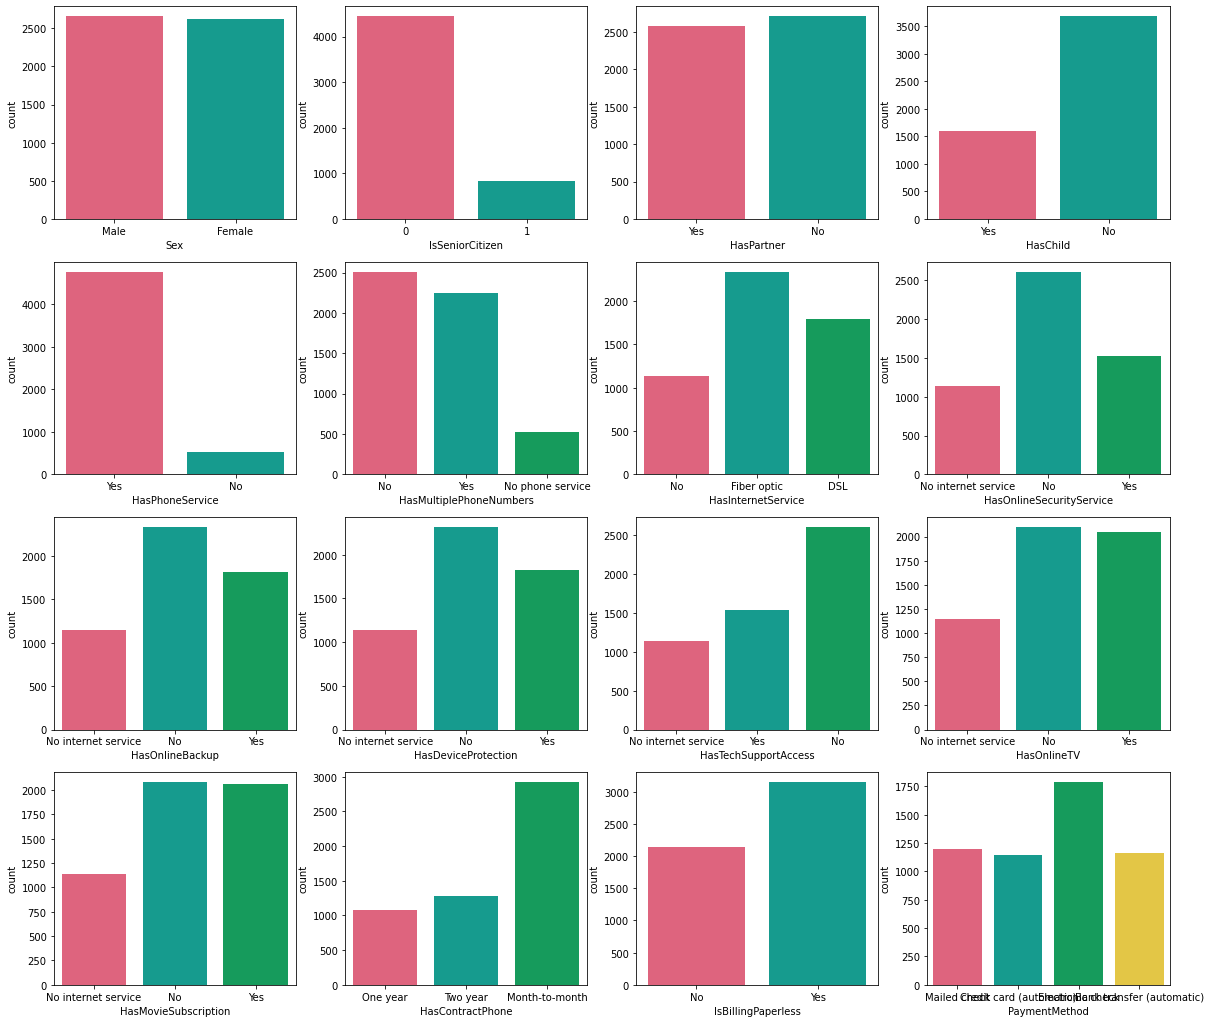

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(20,18))

ax = ax.ravel()

for i in range(len(cat_cols)):
  '''
  b = data[cat_cols[i]].value_counts()
  ax[i].bar(b.index, b.values)
  '''
  ax[i] = sns.countplot(data[cat_cols[i]] ,ax=ax[i], palette= ['#F25072','#00B1A0','#00B15D','#FDD72C'])
  None
fig.show()
None

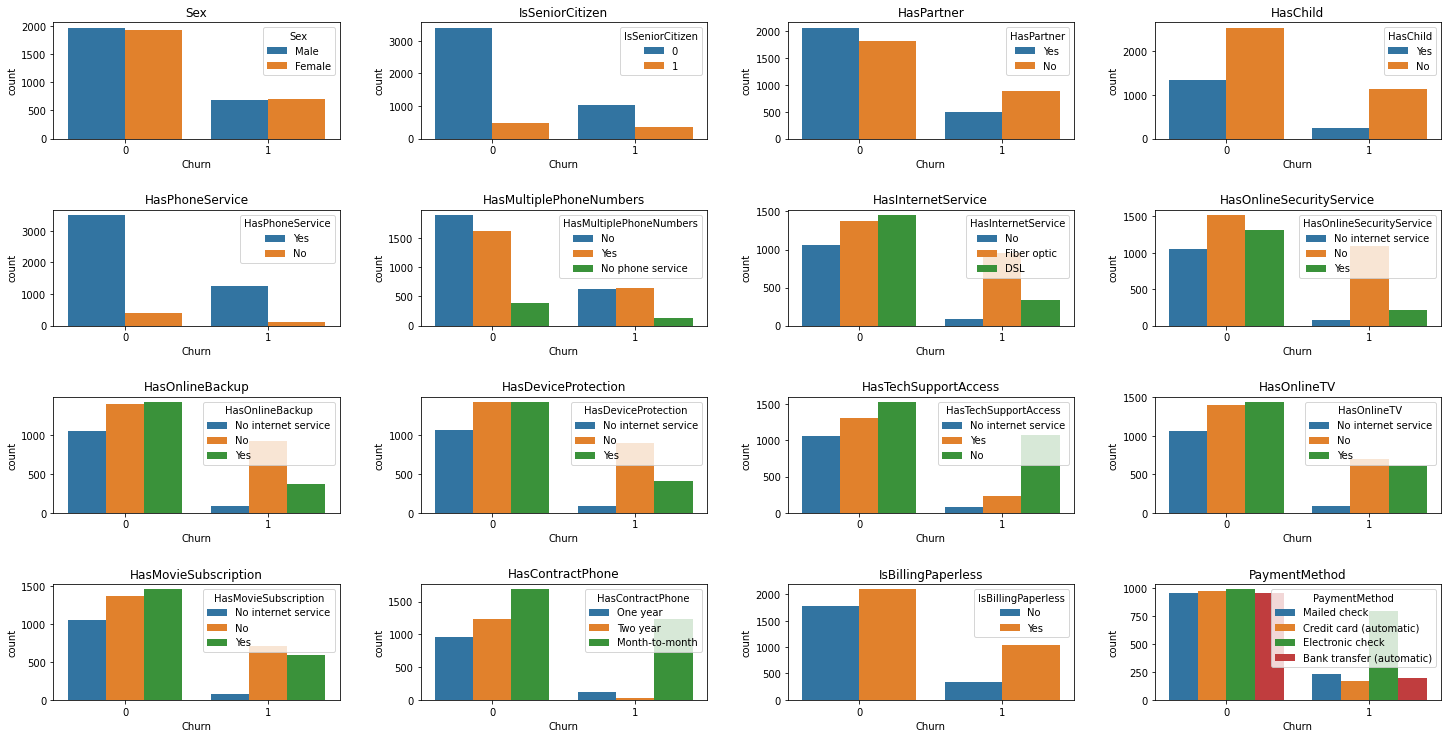

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
axes = axes.reshape(1,-1)[0]
fig.tight_layout(h_pad=5, w_pad=5)
for ix, col in enumerate(cat_cols):
    axes[ix].set_title(col)
#     data[col].value_counts().plot(kind='barh', ax=axes[ix])
    sns.countplot(x='Churn', hue=col, data=data, ax=axes[ix])

In [ ]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2291.390461,0.159409,0.262022
std,24.550326,30.176464,2267.079956,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,401.587500,0.000000,0.000000
50%,29.000000,70.400000,1413.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [28]:
X = data[feature_cols]
y = data[target_col]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


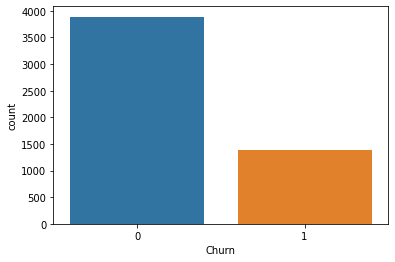

In [23]:
sns.countplot(data.iloc[:,-1])          # лекгий дисбаланс присутствует, некритично 

None

Text(0.5, 1.0, 'Churn')

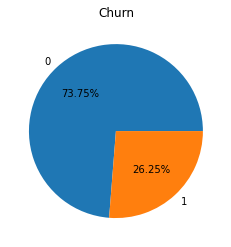

In [24]:
plt.pie(data[target_col].value_counts(), labels=data[target_col].unique(), autopct='%.2f%%')
plt.title(target_col)

## Применение линейных моделей

1) Обработаем данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируем числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью разделения на train/valid выборку протестируем разные значения гиперпараметра C и выберем лучший по метрике ROC-AUC. 

Т.к. мы разделяем на train/valid, то используем LogisticRegressionCV. Он сам при вызове .fit() подберает параметр С. (Передадим scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


In [36]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())]
)

categorical_transformer = Pipeline(steps=[
#     ('label_encoder', LabelEncoder()),
    ('one_hot_encoder',OneHotEncoder())]
)


preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', numeric_transformer, num_cols),
        ('categorical',categorical_transformer, cat_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression(max_iter=1000))
])

In [38]:
clf = GridSearchCV(estimator=pipeline,param_grid={'classifier__C':[0.001,0.01,0.1,1.,10.,100.],
                                                  'classifier__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                   cv=5,n_jobs=8,scoring='roc_auc',refit=True,verbose=1)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('categorical',
                                                            

In [40]:
print('Точность обучения:', clf.score(X_train,y_train))
print('Точность на валидации:', clf.score(X_test,y_test))

Точность обучения: 0.8477050719291078
Точность на валидации: 0.8512106391469378


## Применение градиентного бустинга

Попробуем использовать catboost, поэтому нам не надо кодировать категориальные признаки. А численные признаки нормировать для моделей, основанных на деревьях не нужно.


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,  stratify = y, 
                                                       random_state=42)

In [32]:
#!pip install catboost
import catboost

     |████████████████████████████████| 76.3 MB 12 kB/s 


In [33]:
boosting = catboost.CatBoostClassifier(cat_features = cat_cols)  # базовый катбуст, просто для ознакомления с алгоритмом
boosting.fit(X_train,y_train)
None

Learning rate set to 0.019048
0:	learn: 0.6808942	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.6712153	total: 83.2ms	remaining: 41.5s
2:	learn: 0.6592359	total: 102ms	remaining: 33.9s
3:	learn: 0.6483725	total: 115ms	remaining: 28.5s
4:	learn: 0.6384259	total: 131ms	remaining: 26.1s
5:	learn: 0.6286914	total: 147ms	remaining: 24.3s
6:	learn: 0.6193630	total: 163ms	remaining: 23.1s
7:	learn: 0.6102670	total: 176ms	remaining: 21.8s
8:	learn: 0.6020932	total: 190ms	remaining: 20.9s
9:	learn: 0.5941352	total: 212ms	remaining: 21s
10:	learn: 0.5865178	total: 227ms	remaining: 20.5s
11:	learn: 0.5794635	total: 242ms	remaining: 19.9s
12:	learn: 0.5727147	total: 254ms	remaining: 19.3s
13:	learn: 0.5660818	total: 271ms	remaining: 19.1s
14:	learn: 0.5595206	total: 287ms	remaining: 18.9s
15:	learn: 0.5546276	total: 295ms	remaining: 18.1s
16:	learn: 0.5488838	total: 310ms	remaining: 17.9s
17:	learn: 0.5432101	total: 332ms	remaining: 18.1s
18:	learn: 0.5369794	total: 348ms	remaining: 18s
19:	learn: 0.

In [34]:
y_predictions = boosting.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_predictions)
auc

0.851238480599148

In [ ]:
 # Поиск лучших параметро по сетке.
 boosting2 = catboost.CatBoostClassifier(n_estimators = 200,
                                        learning_rate = 0.2222222238779068,
                                        depth = 2,
                                        cat_features = cat_cols)
boosting2.grid_search({'l2_leaf_reg': np.linspace(0, 1, 10),       
                       'depth': range(1,6)}, 
                           X_train,y_train, plot=True, refit=True)

In [ ]:
boosting3 = catboost.CatBoostClassifier(n_estimators = 200,
                                       learning_rate = 0.2222222238779068,
                                       depth = 2, eval_metric='AUC',
                                       cat_features = cat_cols)
boosting3.fit(X_train,y_train)
None

y_tr_predictions = boosting3.predict_proba(X_train)[:,1]
auc_tr = roc_auc_score(y_train, y_tr_predictions)

y_predictions = boosting3.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_predictions)

In [ ]:
print('Точность обучения:',auc_tr) 
print('Точность на валидации:',auc)

Точность поезда: 0.8636998359697516
Точность валидная: 0.8535446808905552


# Предсказания

In [ ]:
best_model = boosting3

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv',index_col=0)

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')